<a href="https://colab.research.google.com/github/PiotrusWatson/level4project/blob/master/data/ipynbs/textual_entailment_snli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##HAHA ITS TIME TO SPEND 5 HOURS DOWNLOADING THINGS

lets get the snli dataset baybee

In [1]:
!wget https://nlp.stanford.edu/projects/snli/snli_1.0.zip
!unzip snli_1.0.zip

--2020-02-19 16:39:21--  https://nlp.stanford.edu/projects/snli/snli_1.0.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94550081 (90M) [application/zip]
Saving to: ‘snli_1.0.zip’

snli_1.0.zip        100%[===================>]  90.17M  65.4MB/s    in 1.4s    

2020-02-19 16:39:22 (65.4 MB/s) - ‘snli_1.0.zip’ saved [94550081/94550081]

Archive:  snli_1.0.zip
   creating: snli_1.0/
  inflating: snli_1.0/.DS_Store      
   creating: __MACOSX/
   creating: __MACOSX/snli_1.0/
  inflating: __MACOSX/snli_1.0/._.DS_Store  
 extracting: snli_1.0/Icon           
  inflating: __MACOSX/snli_1.0/._Icon  
  inflating: snli_1.0/README.txt     
  inflating: __MACOSX/snli_1.0/._README.txt  
  inflating: snli_1.0/snli_1.0_dev.jsonl  
  inflating: snli_1.0/snli_1.0_dev.txt  
  inflating: snli_1.0/snli_1.0_test.jsonl  
  inflating: snli_1.0/snli_1.0_

In [2]:
# Download the Glove.zip file and expand it.
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-02-19 16:39:31--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-02-19 16:39:31--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-02-19 16:39:31--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [3]:
# Get the PolitiFact Dataset from the location provided in the DeClarE paper.
!wget http://resources.mpi-inf.mpg.de/impact/dl_cred_analysis/PolitiFact.zip
!unzip PolitiFact.zip

--2020-02-19 16:46:28--  http://resources.mpi-inf.mpg.de/impact/dl_cred_analysis/PolitiFact.zip
Resolving resources.mpi-inf.mpg.de (resources.mpi-inf.mpg.de)... 139.19.206.46
Connecting to resources.mpi-inf.mpg.de (resources.mpi-inf.mpg.de)|139.19.206.46|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4976217 (4.7M) [application/zip]
Saving to: ‘PolitiFact.zip’

PolitiFact.zip      100%[===================>]   4.75M  3.85MB/s    in 1.2s    

2020-02-19 16:46:30 (3.85 MB/s) - ‘PolitiFact.zip’ saved [4976217/4976217]

Archive:  PolitiFact.zip
   creating: PolitiFact/
  inflating: PolitiFact/README       
  inflating: PolitiFact/politifact.tsv  


In [4]:
!git clone https://github.com/FakeNewsChallenge/fnc-1.git


Cloning into 'fnc-1'...
remote: Enumerating objects: 49, done.
remote: Total 49 (delta 0), reused 0 (delta 0), pack-reused 49
Unpacking objects: 100% (49/49), done.


In [5]:
# Get the Snopes Dataset from the location provided in the DeClarE paper.
!wget http://resources.mpi-inf.mpg.de/impact/dl_cred_analysis/Snopes.zip
!unzip Snopes.zip

--2020-02-19 16:46:35--  http://resources.mpi-inf.mpg.de/impact/dl_cred_analysis/Snopes.zip
Resolving resources.mpi-inf.mpg.de (resources.mpi-inf.mpg.de)... 139.19.206.46
Connecting to resources.mpi-inf.mpg.de (resources.mpi-inf.mpg.de)|139.19.206.46|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5559754 (5.3M) [application/zip]
Saving to: ‘Snopes.zip’

Snopes.zip          100%[===================>]   5.30M  4.38MB/s    in 1.2s    

2020-02-19 16:46:37 (4.38 MB/s) - ‘Snopes.zip’ saved [5559754/5559754]

Archive:  Snopes.zip
   creating: Snopes/
  inflating: Snopes/README           
  inflating: Snopes/snopes.tsv       


Some imports lol :P

In [6]:
!pwd

/content


##LOOK AT ALL THIS CODE TO IMPORT DATA GOD THERE MUST BE SOMETHING WRONG WITH ME

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import torch,keras

from sklearn.model_selection import train_test_split, KFold
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.nn.parameter import Parameter
from torch.nn import init
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as data_utils

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import math

np.random.seed(128)

Using TensorFlow backend.


lets load this shit :^)

In [0]:
train_dataframe = pd.read_json('./snli_1.0/snli_1.0_train.jsonl', lines=True)
test_dataframe = pd.read_json('./snli_1.0/snli_1.0_test.jsonl', lines=True)


In [9]:
train_dataframe.head(50)

,annotator_labels,captionID,gold_label,pairID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse
0,[neutral],3416050480.jpg#4,neutral,3416050480.jpg#4r1n,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,A person is training his horse for a competition.,( ( A person ) ( ( is ( ( training ( his horse...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
1,[contradiction],3416050480.jpg#4,contradiction,3416050480.jpg#4r1c,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,"A person is at a diner, ordering an omelette.",( ( A person ) ( ( ( ( is ( at ( a diner ) ) )...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
2,[entailment],3416050480.jpg#4,entailment,3416050480.jpg#4r1e,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,"A person is outdoors, on a horse.","( ( A person ) ( ( ( ( is outdoors ) , ) ( on ...",(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
3,[neutral],2267923837.jpg#2,neutral,2267923837.jpg#2r1n,Children smiling and waving at camera,( Children ( ( ( smiling and ) waving ) ( at c...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,They are smiling at their parents,( They ( are ( smiling ( at ( their parents ) ...,(ROOT (S (NP (PRP They)) (VP (VBP are) (VP (VB...
4,[entailment],2267923837.jpg#2,entailment,2267923837.jpg#2r1e,Children smiling and waving at camera,( Children ( ( ( smiling and ) waving ) ( at c...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,There are children present,( There ( ( are children ) present ) ),(ROOT (S (NP (EX There)) (VP (VBP are) (NP (NN...
5,[contradiction],2267923837.jpg#2,contradiction,2267923837.jpg#2r1c,Children smiling and waving at camera,( Children ( ( ( smiling and ) waving ) ( at c...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,The kids are frowning,( ( The kids ) ( are frowning ) ),(ROOT (S (NP (DT The) (NNS kids)) (VP (VBP are...
6,[contradiction],3691670743.jpg#0,contradiction,3691670743.jpg#0r1c,A boy is jumping on skateboard in the middle o...,( ( A boy ) ( ( is ( ( jumping ( on skateboard...,(ROOT (S (NP (DT A) (NN boy)) (VP (VBZ is) (VP...,The boy skates down the sidewalk.,( ( The boy ) ( ( ( skates down ) ( the sidewa...,(ROOT (S (NP (DT The) (NN boy)) (VP (VBZ skate...
7,[entailment],3691670743.jpg#0,entailment,3691670743.jpg#0r1e,A boy is jumping on skateboard in the middle o...,( ( A boy ) ( ( is ( ( jumping ( on skateboard...,(ROOT (S (NP (DT A) (NN boy)) (VP (VBZ is) (VP...,The boy does a skateboarding trick.,( ( The boy ) ( ( does ( a ( skateboarding tri...,(ROOT (S (NP (DT The) (NN boy)) (VP (VBZ does)...
8,[neutral],3691670743.jpg#0,neutral,3691670743.jpg#0r1n,A boy is jumping on skateboard in the middle o...,( ( A boy ) ( ( is ( ( jumping ( on skateboard...,(ROOT (S (NP (DT A) (NN boy)) (VP (VBZ is) (VP...,The boy is wearing safety equipment.,( ( The boy ) ( ( is ( wearing ( safety equipm...,(ROOT (S (NP (DT The) (NN boy)) (VP (VBZ is) (...
9,[neutral],4804607632.jpg#0,neutral,4804607632.jpg#0r1n,An older man sits with his orange juice at a s...,( ( An ( older man ) ) ( ( ( sits ( with ( ( h...,(ROOT (S (NP (DT An) (JJR older) (NN man)) (VP...,An older man drinks his juice as he waits for ...,( ( An ( older man ) ) ( ( ( drinks ( his juic...,(ROOT (S (NP (DT An) (JJR older) (NN man)) (VP...


Helper functions: something that bulk converts things into lists, and a tokeniser that also pads and numpies things

In [160]:
def merge_bodies(articles, claims):
  merged = pd.merge(articles, claims, on="Body ID")
  mapping = {"disagree": 0, "discuss": 1, "unrelated": 2, "agree": 3}
  return merged.replace({"Stance": mapping})
  
  
train_articles = pd.read_csv("./fnc-1/train_bodies.csv")
train_claims = pd.read_csv("./fnc-1/train_stances.csv")
test_articles = pd.read_csv("./fnc-1/test_bodies.csv")
test_claims = pd.read_csv("./fnc-1/test_stances_unlabeled.csv")


train_challenge = merge_bodies(train_articles, train_claims)
train_challenge, val_challenge = train_test_split(train_challenge, test_size=0.1, random_state=8)

test_challenge = merge_bodies(test_articles, test_claims)
train_challenge.head()


,Body ID,articleBody,Headline,Stance
39952,2109,A SCHOOLBOY who was almost killed when he was ...,Islamic State claims it executed American phot...,2
20359,1212,Tiger Woods divorced Swedish model Elin Nordeg...,Sources: Guns N' Roses Frontman Axl Rose Found...,2
11075,682,There has been a shooting at the War Memorial ...,Wife and child of Islamic State leader Baghdad...,2
47329,2413,You may have a seen a story going around Faceb...,Armed U.S. drones spotted flying over Syria in...,2
15650,942,"Ok, this is all still rumor, but there’s a cha...",UPDATE: BATMAN v SUPERMAN Batmobile Reportedly...,1


also: lets load politifact :^^)

In [0]:
facts = pd.read_csv('./PolitiFact/politifact.tsv', delimiter = '\t', names = ['cred_label','claim_id','claim_text','claim_source','article','article_source'])
facts.head(50)
snopes = pd.read_csv("./Snopes/snopes.tsv", delimiter= "\t", names=['cred_label','claim_id','claim_text','article','article_source'])
politi_mapping = {"True": 1, "Half-True": 1, "Mostly True": 1, "Mostly False": 0, "False": 0, "Pants on Fire!": 0}
snopes_mapping = {"true": 1, "half-true": 1, "mostly true": 1, "mostly false": 0, "false": 0, "pants on fire!": 0}
fake_news_challenge_mapping = {}

def slice_snopes(unique):
  true_claims = unique[unique["cred_label"] == 1]
  false_claims = unique[unique["cred_label"] == 0]
  false_claims = false_claims.head(int(len(false_claims)/3))
  return pd.concat([true_claims, false_claims]).sample(frac=1)

def preprocess_fact_data(facts, mapping, slice_function=None, is_folding=False):
  
  facts = facts.replace({"cred_label": mapping})
  unique = facts.drop_duplicates("claim_text")
  if (slice_function):
    unique = slice_function(unique)
  
#splitting the claims
  
  if is_folding:
    results = []
    folded = KFold(n_splits=10, shuffle=True)
    splitted_object = folded.split(unique)
    for train_result, test_result in splitted_object:
      train_ilocs = unique.iloc[train_result]["claim_text"]
      test_ilocs = unique.iloc[test_result]["claim_text"]
      results.append((facts[facts["claim_text"].isin(train_ilocs)], facts[facts["claim_text"].isin(test_ilocs)]))

    return results

  train_unique, big_unique = train_test_split(unique, test_size=0.2, random_state=8)
  val_unique, test_unique = train_test_split(big_unique, test_size=0.5, random_state=8)
  

  

#recreating dataset
  test_facts = facts[facts["claim_text"].isin(test_unique["claim_text"])]
  val_facts = facts[facts["claim_text"].isin(val_unique["claim_text"])]
  train_facts = facts[facts["claim_text"].isin(train_unique["claim_text"])]
  return train_facts, test_facts, val_facts
#get unique claims to divide dataset cleanly
train_facts, test_facts, val_facts = preprocess_fact_data(facts, politi_mapping)
train_snopes, test_snopes, val_snopes = preprocess_fact_data(snopes, snopes_mapping, slice_snopes)


In [162]:
test_facts.head(500)

,cred_label,claim_id,claim_text,claim_source,article,article_source
187,1,2014_feb_04_barack-obama_barack-obama-says-its...,isnt schedule narcotic job congress,barack obama,vice news we dont have a timeline on the decis...,reason.com
188,1,2014_feb_04_barack-obama_barack-obama-says-its...,isnt schedule narcotic job congress,barack obama,a schedule i narcotic along with heroin and ec...,reason.com
189,1,2014_feb_04_barack-obama_barack-obama-says-its...,isnt schedule narcotic job congress,barack obama,now do you think you were maybe talking just a...,cnn.com
190,1,2014_feb_04_barack-obama_barack-obama-says-its...,isnt schedule narcotic job congress,barack obama,made to the new yorker that marijuana is no mo...,time.com
526,1,2017_jun_27_donald-trump_white-house-criticism...,obamacare signed law cbo estimated 23 million ...,donald trump,about the affordable health care act in its da...,eugeneweekly.com
...,...,...,...,...,...,...
4849,0,2015_jul_30_blog-posting_websites-say-obama-po...,obama makes huge move ban social security reci...,bloggers,obama to ban guns from 42 million social secur...,bearingarms.com
4850,0,2015_jul_30_blog-posting_websites-say-obama-po...,obama makes huge move ban social security reci...,bloggers,obama is looking to ban social security recipi...,rightwingnews.com
4851,0,2015_jul_30_blog-posting_websites-say-obama-po...,obama makes huge move ban social security reci...,bloggers,main navigation recent posts obama to ban 42 m...,downtrend.com
4852,0,2015_jul_30_blog-posting_websites-say-obama-po...,obama makes huge move ban social security reci...,bloggers,get news like this in your facebook news feed ...,thegatewaypundit.com


In [0]:
def convert_to_lists(names_to_lists):
  for key in names_to_lists:
    names_to_lists[key] = names_to_lists[key].tolist()
  return names_to_lists

class Tokeniser:
  def __init__(self, texts, vocab_size, max_len):
    self.t = Tokenizer()
    self.max_len = max_len
    self.t.num_words = vocab_size
    
    full_corpus = []

    for index in texts:
      for text in texts[index]:
        full_corpus.append(text)
    
    self.t.fit_on_texts(full_corpus)

  def full_process(self, text):
    """OK SO: converts a list of strings into a list of numerical sequences
then pads them out so they're all a consistent size
then returns a numpy array of that :) """
    new_sequence = self.t.texts_to_sequences(text)
    #todo: modify to make it spit out a summarised version ABOUT HERE
    padded_sequence = pad_sequences(new_sequence, maxlen=self.max_len, padding ="post")
    return np.array(padded_sequence, dtype=np.float32)

  def do_everything(self, texts):
    for index in texts:
      texts[index] = self.full_process(texts[index])
    self.word_to_id = self.t.word_index
    return texts



  
# Get the embedding matrix using Glove. 
vocab,word2idx = None,{}

def load_glove_embeddings(path, word2idx, embedding_dim):
    """Loading the glove embeddings"""
    vocab_size = len(word2idx) + 1
    print(vocab_size)
    with open(path) as f:
        embeddings = np.zeros((vocab_size, embedding_dim))
        for line in f.readlines():
            values = line.split()
            word = values[0]
            index = word2idx.get(word)
            if index:
                vector = np.array(values[1:], dtype='float32')
                if vector.shape[-1] != embedding_dim:
                    raise Exception('Dimension not matching.')
                embeddings[index] = vector
        return torch.from_numpy(embeddings).float()

#assumption: we're going to only care about classification per text
def generate_indexes(labels):
  return [1 if label == "neutral" else 2 if label == "entailment" else 0 for label in labels]

index_to_label = ["contradiction","neutral","entailment"]


In [0]:
class Dataset:
  def __init__(self, train_loader, test_loader, val_loader, test_data, val_data, tokeniser):
    self.train_loader = train_loader
    self.test_loader = test_loader
    self.val_loader = val_loader
    self.test_data = test_data
    self.val_data = val_data
    self.word_embeddings_small = load_glove_embeddings("glove.6B.50d.txt", tokeniser.word_to_id, 50) 

In [0]:
labels = ["claim_text", "article"]
big_labels = ["claim_text", "article", "article_source"]
challenge_labels = ["articleBody", "Headline"]

def get_list(panda, labels):
  label_to_data = {}
  for label in labels:
    label_to_data[label] = panda[label]
  
  x_list = convert_to_lists(label_to_data)
  if labels[0] == "claim_text":
    y_list = panda["cred_label"].tolist()
  else:
    y_list = panda["Stance"].tolist()
  return x_list, y_list

def get_loader(x, y, vocab_size, max_length, batch_size, name, training=True, drop_last=True):
  stuff = []
  for key in x:
    stuff.append(torch.from_numpy(x[key]).type(torch.LongTensor))
  stuff.append(torch.from_numpy(y).type(torch.DoubleTensor))

  tensorset = data_utils.TensorDataset(*stuff)
  loader = data_utils.DataLoader(tensorset, batch_size=batch_size, drop_last=drop_last, shuffle=training)
  loader.name = name
  return loader

  
def get_dataset(train, test, val, vocab_size, max_length, batch_size, labels, name):
  is_challenge = labels[0] == "articleBody"
  train_list_x, train_list_y = get_list(train, labels)
  if not is_challenge:
    test_list_x, test_list_y = get_list(test, labels)
  val_list_x, val_list_y = get_list(val, labels)



  #tokenising various stuff, setting up numpy dictionaries :)
  tokeniser = Tokeniser(train_list_x, vocab_size, max_length)
  x_train = tokeniser.do_everything(train_list_x)
  x_test = tokeniser.do_everything(test_list_x)
  x_val = tokeniser.do_everything(val_list_x)
  y_train = np.array(train_list_y, dtype=np.float32)
  y_test = np.array(test_list_y, dtype=np.float32)
  y_val = np.array(val_list_y, dtype=np.float32)
  
  #datasets/loaders
  train_loader = get_loader(x_train, y_train, vocab_size, max_length, batch_size, name, True)
  test_loader = get_loader(x_test, y_test, vocab_size, max_length, batch_size, name, False, drop_last=False)
  val_loader = get_loader(x_val, y_val, vocab_size, max_length, batch_size, name, False)
  return Dataset(train_loader, test_loader, val_loader,  y_test, y_val, tokeniser)





here i set up the tokeniser, and turn everything into a list its a fun cell

In [16]:
MAX_LENGTH = 500
VOCAB_SIZE = 20000
BATCH_SIZE = 100
SAMPLE_SAMPLE_SIZE = 1


snopes_dataset = get_dataset(train_snopes, test_snopes, val_snopes, VOCAB_SIZE, MAX_LENGTH, BATCH_SIZE, labels, "fact_data")
fact_dataset = get_dataset(train_facts, test_facts, val_facts, VOCAB_SIZE, MAX_LENGTH, BATCH_SIZE, labels, "fact_data")
big_snopes = get_dataset(train_snopes, test_snopes, val_snopes, VOCAB_SIZE, MAX_LENGTH, BATCH_SIZE, big_labels, "fact_data")
big_fact = get_dataset(train_facts, test_facts, val_facts, VOCAB_SIZE, MAX_LENGTH, BATCH_SIZE, big_labels, "fact_data")


chopped_train_dataframe = train_dataframe.sample(n=int(len(train_dataframe["sentence1"])/SAMPLE_SAMPLE_SIZE))
x_train_lists = convert_to_lists({"premise": chopped_train_dataframe["sentence1"], "hypothesis": chopped_train_dataframe["sentence2"]})
y_train_list = chopped_train_dataframe["gold_label"].tolist()

x_test_lists = convert_to_lists({"premise": test_dataframe["sentence1"], "hypothesis": test_dataframe["sentence2"]})
y_test_list = test_dataframe["gold_label"].tolist()

x_train_challenge_list = convert_to_lists({"claim_text": train_challenge["Headline"], "article": train_challenge["articleBody"]})
y_train_challenge_list = train_challenge["Stance"].tolist()

x_test_challenge_list = convert_to_lists({"claim_text": test_challenge["Headline"], "article": test_challenge["articleBody"]})





39093
33766
44623
37174


this cell uses the setup tokeniser to SLAP THAT SHIT INTO NUMPY ARRAYS WITH PADDING YEAH BABY
(also tokenises it thats p important)

In [0]:
x_tokeniser = Tokeniser(x_train_lists, VOCAB_SIZE, MAX_LENGTH)
challenge_tokeniser = Tokeniser(x_train_challenge_list, VOCAB_SIZE, MAX_LENGTH)

x_train = x_tokeniser.do_everything(x_train_lists)
x_test = x_tokeniser.do_everything(x_test_lists)
y_train = np.array(generate_indexes(y_train_list), dtype=np.float32)
y_test = np.array(generate_indexes(y_test_list), dtype=np.float32)

x_challenge_train = challenge_tokeniser.do_everything(x_train_challenge_list)
x_challenge_test = challenge_tokeniser.do_everything(x_test_challenge_list)
y_challenge_train = np.array(y_train_challenge_list, dtype=np.float32)



and here we slap the loaded stuff into a neat tensordataset. this is good because ???

In [0]:
we_shufflin = True
shufflin_test = False
#alright lets tensordataset textual entailment stuff
train_data = data_utils.TensorDataset(torch.from_numpy(x_train["premise"]).type(torch.LongTensor),
                                      torch.from_numpy(x_train["hypothesis"]).type(torch.LongTensor),
                                      torch.from_numpy(y_train).type(torch.DoubleTensor))
train_loader = data_utils.DataLoader(train_data, batch_size=BATCH_SIZE, drop_last=True, shuffle=we_shufflin)
train_loader.name = "entailment_data"

test_data = data_utils.TensorDataset(torch.from_numpy(x_test["premise"]).type(torch.LongTensor),
                                      torch.from_numpy(x_test["hypothesis"]).type(torch.LongTensor),
                                      torch.from_numpy(y_test).type(torch.DoubleTensor))
test_loader = data_utils.DataLoader(test_data, batch_size=BATCH_SIZE, drop_last=False, shuffle=shufflin_test )
test_loader.name = "entailment_data"


#POLITIFACT/SNOPES W/ SOURCES


train_data = data_utils.TensorDataset(torch.from_numpy(x_challenge_train["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_challenge_train["article"]).type(torch.LongTensor),
                                      torch.from_numpy(y_challenge_train).type(torch.DoubleTensor))
train_challenge_loader = data_utils.DataLoader(train_data, batch_size=BATCH_SIZE, drop_last=True, shuffle=we_shufflin)
train_challenge_loader.name = "challenge_data"

test_data = data_utils.TensorDataset(torch.from_numpy(x_challenge_test["claim_text"]).type(torch.LongTensor),
                                      torch.from_numpy(x_challenge_test["article"]).type(torch.LongTensor))
test_challenge_loader = data_utils.DataLoader(test_data, batch_size=BATCH_SIZE, drop_last=False, shuffle=shufflin_test )
test_loader.name = "challenge_data"

Helper function. I don't know why we have such a helper function but it's here.
Does a softmax after transposing and reshaping things ??


In [0]:
def softmax(input, axis=1):
    """
        Softmax applied to axis=n
 
        Args:
           input: {Tensor,Variable} input on which softmax is to be applied
           axis : {int} axis on which softmax is to be applied
 
        Returns:
            softmaxed tensors
 
       
    """
    input_size = input.size()
    trans_input = input.transpose(axis, len(input_size)-1)
    trans_size = trans_input.size()
    input_2d = trans_input.contiguous().view(-1, trans_size[-1])
    soft_max_2d = F.softmax(input_2d)
    soft_max_nd = soft_max_2d.view(*trans_size)  
    return soft_max_nd.transpose(axis, len(input_size)-1)

First part of the model (split out so to test alone)
Basically, a wrapper for an lstm
Takes in a sequence, spits out a sequence of matrices demonstrating ~an understanding~ of the data

##TEXTUAL ENTAILMENT MODEL CODE

In [0]:
class SequenceProcessor(torch.nn.Module):  
  def __init__(self, word_embeddings, hp):
    super(SequenceProcessor, self).__init__()
    self.hp = hp
    
    self.embeddings = torch.nn.Embedding(hp.max_length, word_embeddings.size(1))

    self.embeddings.weight = torch.nn.Parameter(word_embeddings)
    self.embedding_size = word_embeddings.size(1)
    self.normaliser = torch.nn.BatchNorm1d(self.embedding_size)
    self.cool_lstm = torch.nn.LSTM(
        input_size = self.embedding_size,
        hidden_size = hp.lstm_hidden_size,
        num_layers=1,
        batch_first=True,
        bidirectional=True
      )
    self.dropout = torch.nn.Dropout(p=hp.inner_dropout)

    
  def forward(self, x, hidden_layer):
    embedding = self.embeddings(x[:, 0:self.hp.max_length])
    #embedding = self.normaliser(embedding.transpose(1,2))
    embedding = self.dropout(embedding)
    return self.cool_lstm(embedding,
                          hidden_layer)


Next bit of model. Given a processed set of 

In [0]:
class AttentionModel(torch.nn.Module):
  def __init__(self, hp):
    super(AttentionModel, self).__init__()
    self.first_linear = torch.nn.Linear(
        in_features= 2*hp.lstm_hidden_size,
        out_features = hp.dense_dimension,
        bias = False
    )
    self.second_linear = torch.nn.Linear(
        in_features = hp.dense_dimension,
        out_features = hp.attention_hops,
        bias = False
    )
    self.dropout = torch.nn.Dropout(p=hp.inner_dropout)

  def forward(self, x):
    tanh_W_H = torch.tanh(self.first_linear(x))
    #[512 rows, 150 numerical words, of size 100] (512, 150, 100) <bmm> (1, 100, 100) = (512, 150, 100)
    #another batch matrix multiply, wow!
    tanh_W_H = self.dropout(tanh_W_H)
    weight_by_attention_hops = self.second_linear(tanh_W_H) # (100, 10) by (512, 10, 100)
    #[512 rows, 10 attention hops of size 100] (512, 150, 100) <bmm> (1, 10, 100) = (512, 10, 150)
    
    attention = softmax(weight_by_attention_hops).transpose(2,1)
    sentence_embeddings = torch.bmm(attention,x)
    return sentence_embeddings, attention


In [0]:
def better_mush(premise, hypothesis):
    pooled_premise1 = premise[:,:,::2]
    pooled_premise2 = premise[:,:,1::2]
    pooled_hypothesis1 = hypothesis[:,:,::2]
    pooled_hypothesis2 = hypothesis[:,:,1::2]

    better_mush = torch.cat((pooled_premise1 * pooled_hypothesis1 + pooled_premise2 * pooled_hypothesis2,
                               pooled_premise1 * pooled_hypothesis2 - pooled_premise2 * pooled_hypothesis1),2)
    return better_mush

class Factoriser(torch.nn.Module):
  def __init__(self, hp):
    super(Factoriser, self).__init__()
    self.premise_weight = Parameter(torch.Tensor(
        hp.attention_hops, 
        hp.lstm_hidden_size*2,
        hp.gravity
        ))
    self.premise_dropout = torch.nn.Dropout(p=hp.inner_dropout)
    self.hypothesis_weight = Parameter(torch.Tensor(
        hp.attention_hops, 
        hp.lstm_hidden_size*2,
        hp.gravity
        ))
    self.hypothesis_dropout = torch.nn.Dropout(p=hp.inner_dropout)
    init.kaiming_uniform_(self.premise_weight, a=math.sqrt(5))
    init.kaiming_uniform_(self.hypothesis_weight, a=math.sqrt(5))

  def batcheddot(self, a, b):
    better_a = a.transpose(0,1)
    bmmd = torch.bmm(better_a, b)
    return bmmd.transpose(0,1)

  def forward(self, premise, hypothesis):

    premise_factor = self.batcheddot(premise, self.premise_weight)
    premise_factor = self.premise_dropout(premise_factor)
    hypothesis_factor = self.batcheddot(hypothesis, self.hypothesis_weight)
    hypothesis_factor = self.hypothesis_dropout(hypothesis_factor)
    return better_mush(premise_factor,hypothesis_factor)

In [0]:
class MLP(torch.nn.Module):
  def __init__(self, hp):
    super(MLP, self).__init__()
    self.linear1 = torch.nn.Linear(
        in_features=hp.attention_hops*hp.gravity, 
        out_features=50)
    self.linear2 = torch.nn.Linear(50, 20)
    self.dropout1 = torch.nn.Dropout(p=hp.inner_dropout)
    self.dropout2 = torch.nn.Dropout(p=hp.inner_dropout)
    if hp.avg:
      self.final_linear = torch.nn.Linear(hp.gravity, hp.num_classes)
    else:
      self.final_linear = torch.nn.Linear(20, hp.num_classes)
    self.hp = hp
  def forward(self, x):
    if self.hp.avg:
      x = torch.sum(x, 1)/self.hp.attention_hops
      x = self.dropout1(x)
    else:
      x = torch.relu(self.linear1(x.reshape(self.hp.batch_size, -1)))
      x = self.dropout1(x)
      x = torch.relu(self.linear2(x))
      x = self.dropout2(x)
    if (self.hp.num_classes > 1):
      x = softmax(self.final_linear(x))
    else:
      x = torch.sigmoid(self.final_linear(x))
    return x

In [0]:
class TextualEntailmentModel(torch.nn.Module):

  def init_hidden(self):
    hidden_state = torch.zeros(2,self.hp.batch_size,self.hp.lstm_hidden_size).cuda()
    cell_state = torch.zeros(2,self.hp.batch_size, self.hp.lstm_hidden_size).cuda()
    return (hidden_state, cell_state)
  def reset_for_testing(self, new_batch):
    self.hp.batch_size = new_batch
    self.hidden_state = self.init_hidden()

  def __init__(self, hp, word_embeddings):
    super(TextualEntailmentModel, self).__init__()
    print(word_embeddings.shape)
    self.hp = hp
    self.premise_processor = SequenceProcessor(word_embeddings, hp)
    self.hypothesis_processor = SequenceProcessor(word_embeddings, hp)
    self.premise_embedder = AttentionModel(hp)
    self.hypothesis_embedder = AttentionModel(hp)
    self.factoriser = Factoriser(hp)
    self.MLP = MLP(hp)
    self.hidden_state = self.init_hidden()
    self.dropouts = [torch.nn.Dropout(p=hp.outer_dropout),
                     torch.nn.Dropout(p=hp.outer_dropout),
                     torch.nn.Dropout(p=hp.outer_dropout),
                     torch.nn.Dropout(p=hp.outer_dropout),
                     torch.nn.Dropout(p=hp.outer_dropout)]
  
  def forward(self, premise, hypothesis):
    processed_premise, self.hidden_state = self.premise_processor(premise, self.hidden_state)
    self.dropouts[0](processed_premise)
    premise_embedding, premise_attention = self.premise_embedder(processed_premise)
    self.dropouts[1](premise_embedding)
    processed_hypothesis, self.hidden_state = self.hypothesis_processor(hypothesis, self.hidden_state)
    self.dropouts[2](processed_hypothesis)
    hypothesis_embedding, hypothesis_attention = self.hypothesis_embedder(processed_hypothesis)
    self.dropouts[3](hypothesis_embedding)
    factorised_mush = self.factoriser(premise_embedding, hypothesis_embedding)
    self.dropouts[4](factorised_mush)
    return self.MLP(factorised_mush), hypothesis_attention*premise_attention



##EVAL SUMMARY :)

##SHEENABASELINE CODE

In [0]:
class BaselineSentenceEntailment(torch.nn.Module):
  def init_hidden(self):
    hidden_state = Variable(torch.zeros(2,self.hp.batch_size,self.hp.lstm_hidden_size)).cuda()
    cell_state = Variable(torch.zeros(2,self.hp.batch_size, self.hp.lstm_hidden_size)).cuda()
    return (hidden_state, cell_state)
  def reset_for_testing(self, new_batch):
    self.hp.batch_size = new_batch
    self.hidden_state = self.init_hidden()

  def __init__(self, hp, word_embeddings):
    super(BaselineSentenceEntailment, self).__init__()
    self.hp = hp
    self.premise_embeddings = torch.nn.Embedding(word_embeddings.size(0), word_embeddings.size(1))
    self.premise_embeddings.weight = torch.nn.Parameter(word_embeddings)
    self.premise_embedding_size = word_embeddings.size(1)
    self.premise_lstm = torch.nn.LSTM(
        input_size = self.premise_embedding_size,
        hidden_size = hp.lstm_hidden_size,
        num_layers=1,
        batch_first=True,
        bidirectional=True
      )
    self.hypothesis_processor = SequenceProcessor(word_embeddings, hp)
    self.premise_embedder = AttentionModel(hp)
    self.hypothesis_embedder = AttentionModel(hp)
    self.linear_final = torch.nn.Linear(hp.lstm_hidden_size*2, hp.num_classes)
    self.dropouts = [torch.nn.Dropout(p=hp.outer_dropout)]*5
  def forward(self, premise, hypothesis):
    #premise/hypothesis embeddinbgs
    embeddings = self.premise_embeddings(premise)
    added_embeddings = self.premise_embeddings(hypothesis[:, :100])
    main_embeddings = torch.cat((embeddings, added_embeddings), 1)
    reshaped_embeddings = main_embeddings.view(self.hp.batch_size, self.hp.max_length, -1)
    processed_premise, hidden_state = self.premise_lstm(main_embeddings, self.hidden_state)
    processed_premise = self.dropouts[0](processed_premise)
    premise_embedding, premise_attention = self.premise_embedder(processed_premise)
    premise_embedding = self.dropouts[1](premise_embedding)
    
    processed_hypothesis, hidden_state = self.hypothesis_processor(hypothesis, hidden_state)
    processed_hypothesis = self.dropouts[2](processed_hypothesis)
    hypothesis_embedding, hypothesis_attention = self.hypothesis_embedder(processed_hypothesis)
    hypothesis_embedding = self.dropouts[3](hypothesis_embedding)
    combined = premise_embedding * hypothesis_embedding
    avg = torch.sum(combined, 1)/self.hp.attention_hops
    avg = self.dropouts[4](avg)
    output = torch.sigmoid(self.linear_final(avg))
    return output, hypothesis_attention

##BAD DECLARE CODE

In [0]:
class BaselineDeclare(torch.nn.Module):
  def init_hidden(self):
    hidden_state = Variable(torch.zeros(2,self.hp.batch_size,self.hp.lstm_hidden_size)).cuda()
    cell_state = Variable(torch.zeros(2,self.hp.batch_size, self.hp.lstm_hidden_size)).cuda()
    return (hidden_state, cell_state)
  def reset_for_testing(self, new_batch):
    self.hp.batch_size = new_batch
    self.hidden_state = self.init_hidden()

  def load_embeddings(self, word_embeddings):
    self.premise_embeddings = torch.nn.Embedding(word_embeddings.size(0), word_embeddings.size(1))
    self.premise_embeddings.weight = torch.nn.Parameter(word_embeddings)
    self.premise_embedding_size = word_embeddings.size(1)
    self.hypothesis_processor = SequenceProcessor(word_embeddings, self.hp)
  
  def __init__(self, hp, word_embeddings):
    super(BaselineDeclare, self).__init__()
    self.hp = hp
    self.embeddings_size = word_embeddings.size(1)
    self.premise_embeddings = torch.nn.Embedding(word_embeddings.size(0), word_embeddings.size(1))
    self.premise_embeddings.weight = torch.nn.Parameter(word_embeddings)
    self.premise_embedding_size = word_embeddings.size(1)
    self.premise_lstm = torch.nn.LSTM(
        input_size = self.premise_embedding_size,
        hidden_size = hp.lstm_hidden_size,
        num_layers=1,
        batch_first=True,
        bidirectional=True
      )
    self.hypothesis_processor = SequenceProcessor(word_embeddings, hp)
    self.premise_linear = torch.nn.Linear(2*hp.lstm_hidden_size, 2*hp.lstm_hidden_size)

    self.linear_penultimate = torch.nn.Linear(101, 8)
    #TODO: add third dense layer with relu
    self.linear_final = torch.nn.Linear(8, hp.num_classes)

  def forward(self, premise, hypothesis):
    #get word embeddings for claim, take a mean over the length
    embeddings = self.premise_embeddings(premise)
    mean_embeddings = torch.unsqueeze(torch.sum(embeddings, 1) / self.hp.max_length, 1) #change to accurate size of lenfgth
  

    #get word embeddings for article, slap that onto the much smaller claim
    added_embeddings = self.premise_embeddings(hypothesis[:, :100])
    #TODO: use repeat function to get 100*100
    main_embeddings = torch.cat((mean_embeddings, added_embeddings), 1)
    #shape is 101 * 50

    #attention processing on claim+article combination
    processed_premise, hidden_state = self.premise_lstm(main_embeddings, self.hidden_state)
    attention_weights = softmax(self.premise_linear(processed_premise))#TODO: turn into row vector
    #simple embedding of article alone
    processed_hypothesis, hidden_state = self.hypothesis_processor(hypothesis, hidden_state)
    #matrix multiply of the two
    combined = torch.bmm(processed_hypothesis,attention_weights.transpose(1,2))
    #final processing - another average, and then a relu + sigmoid
    avg = torch.sum(combined, 1)/self.hp.max_length #todo: fix padding

    smaller = F.relu(self.linear_penultimate(avg))
    output = torch.sigmoid(self.linear_final(smaller))
    return output, torch.zeros(self.hp.batch_size, self.hp.attention_hops, self.hp.lstm_hidden_size*2).cuda()

## GOOD DECLARE CODE???


In [0]:
class RealDeclare(torch.nn.Module):
  def init_hidden(self):
    hidden_state = Variable(torch.zeros(2,self.hp.batch_size,self.hp.lstm_hidden_size)).cuda()
    cell_state = Variable(torch.zeros(2,self.hp.batch_size, self.hp.lstm_hidden_size)).cuda()
    return (hidden_state, cell_state)
  def reset_for_testing(self, new_batch):
    self.hp.batch_size = new_batch
    self.hidden_state = self.init_hidden()

  def __init__(self, hp, word_embeddings):
    super(RealDeclare, self).__init__()
    self.hp = hp
    self.embeddings_size = word_embeddings.size(1)
    self.premise_embeddings = torch.nn.Embedding(hp.max_length, word_embeddings.size(1))
    self.premise_embeddings.weight = torch.nn.Parameter(word_embeddings)
    self.premise_embedding_size = word_embeddings.size(1)
    self.hypothesis_processor = SequenceProcessor(word_embeddings, hp)
    self.premise_linear = torch.nn.Linear(10000, 2*hp.lstm_hidden_size)

    self.linear_penultimate = torch.nn.Linear(100, 8)
    self.linear_almost_there = torch.nn.Linear(8, 8)
    #TODO: add third dense layer with relu
    self.dropout = torch.nn.Dropout(p=0.2)
    self.linear_final = torch.nn.Linear(8, hp.num_classes)

  def forward(self, premise, hypothesis):
    #get word embeddings for claim, take a mean over the length
    embeddings = self.premise_embeddings(premise)
    lengths = self.hp.max_length - (premise == 0).sum(dim=1)
    lengths = lengths.repeat(50, 1).transpose(0,1)
    summed_embeddings = torch.sum(embeddings, 1)
    mean_embeddings = torch.unsqueeze(summed_embeddings / lengths, 1) #change to accurate size of lenfgth
    flattened_embeddings = mean_embeddings.reshape(self.hp.batch_size, -1)

    #get word embeddings for article, slap that onto the much smaller claim
    added_embeddings = self.premise_embeddings(hypothesis[:, :100]).reshape(self.hp.batch_size, -1)
    #TODO: use repeat function to get 100*100 #DONE!
    main_embeddings = torch.cat((flattened_embeddings.repeat(1, 100), added_embeddings), 1)
    #shape is 101 * 50


    #attention processing on claim+article combination
    attention_weights = softmax(torch.tanh(self.premise_linear(main_embeddings)))#TODO: turn into row vector

    #simple embedding of article alone
    processed_hypothesis, hidden_state = self.hypothesis_processor(hypothesis, self.hidden_state)
    #matrix multiply of the two
    combined = torch.bmm(processed_hypothesis, attention_weights.unsqueeze(2))
    

    #final processing - another average, and then a relu + sigmoid
    new_lengths = lengths.repeat(1, 2)

    avg = torch.sum(combined, 1)/new_lengths #todo: fix padding

    smaller = F.relu(self.linear_penultimate(avg))
    smaller = self.dropout(smaller)
    even_smaller = F.relu(self.linear_almost_there(smaller))
    output = torch.sigmoid(self.linear_final(even_smaller))
    return output, torch.zeros(self.hp.batch_size, self.hp.attention_hops, self.hp.lstm_hidden_size*2).cuda()

##TRAIN/TEST/HELPERS
HELPER FUNCTIONS FOR DOIN SOME TRAININ AND TESTIN

In [0]:
from inspect import signature
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def l2_matrix_norm(m):
  return torch.sum(torch.sum(torch.sum(m**2,1),1)**0.5).type(torch.DoubleTensor)


def load_data(data):
  for i in range(len(data)):
    data[i] = Variable(data[i]).cuda()
  return data

def free_data(data):
  for point in data:
    del(point)
def check_data(loader, model):
  sample_data = loader.dataset[0]
  print(torch.max(loader.dataset[:][-1]))
  model_params = len(signature(model).parameters)
  return len(sample_data) - 1 != model_params       

TRAIN FUNCT, ITS BIG CAUSE IT DOES PRETTY MUCH EVERYTHING

INCLUDING NORMALISATION IN THE WEIRD WAY THE SELF ATTENTIVE MODEL REQUIRES

ALSO A SWITCH TO ENSURE IT DOES THE BEST AT GETTING BOTH BINARY AND NON BINARY LOSS :)

In [0]:
def should_stop(losses, limit):
  shouldnt_stop = False 
  if len(losses) < limit:
    return False
  last = losses[-1]
  if limit == 2:
    return last >= losses[-2]
  
  for i in range(len(losses)-2, len(losses) - limit):
    shouldnt_stop = shouldnt_stop or last < losses[i]
    last = losses[i]
  return not shouldnt_stop


def train(model=None, 
          dataset = None, 
          loss_function=None, 
          optimiser=None, 
          hp=None, 
          using_gradient_clipping=False):
  
  model.reset_for_testing(train_loader.batch_size)
  model.train()
  losses = []
  accuracies = []
  val_losses = []
  val_accuracies = []

  is_binary = hp.num_classes == 1
  is_validating = False
  has_stopped = False
  
  if dataset.train_loader.name == "entailment_data" and hp.num_classes != 3:
      raise ValueError("Three classes are needed for entailment to safely happen")
  elif dataset.train_loader.name == "fact_data" and hp.num_classes !=1:
      raise ValueError("Two classes are needed for fact checking to safely happen")
  torch.enable_grad()
  
  for epoch in range(hp.epochs):
    print("Running EPOCH:",epoch+1)

    for i in range(2):
      
      total_loss = 0
      batch_count = 0
      correct = 0
      penal = 0

      if is_validating:
        model.train(False)
        model.eval()
        loader = dataset.val_loader
        torch.no_grad()
        debug_amount = 1
      elif has_stopped:
        model.train(False)
        loader = dataset.train_loader
        torch.no_grad()
        debug_amount = 10
      else:
        model.train(True)
        loader = dataset.train_loader
        torch.enable_grad()
        debug_amount = 10
      
      for batch_index, train_data in enumerate(loader):
      #setting everything up
        model.hidden_state = model.reset_for_testing(train_data[0].shape[0])
        train_data = load_data(train_data)
      
      #get y values - do forward pass and process
        predicted_y, attention = model(*train_data[:-1])
        actual_y = train_data[-1]
        squeezed_y = predicted_y.double().squeeze(1)

      #handling regularisation
        if hp.C > 0:
          attentionT = attention.transpose(1,2)
          identity = torch.eye(attention.size(1))
          identity = Variable(identity.unsqueeze(0).expand(loader.batch_size,
                                                         attention.size(1),
                                                         attention.size(1))).cuda()
          penal = l2_matrix_norm(attention@attentionT - identity).cuda()

      #get loss, accuracy
        if is_binary:
          loss = loss_function(squeezed_y, actual_y.double())
          loss += hp.C * penal/loader.batch_size
          correct += torch.eq(torch.round(squeezed_y), actual_y).data.sum()
        else:
          loss = loss_function(squeezed_y,actual_y.long()) + hp.C * (penal/loader.batch_size)
          correct += torch.eq(torch.argmax(squeezed_y, 1), actual_y).data.sum()
        total_loss += loss.data

        if using_gradient_clipping:
          torch.nn.utils.clip_grad_norm(model.parameters(), 0.5)
      
      #cleaning up regularisation
        if hp.C > 0:
          del(penal)
          del(identity)
          del(attentionT)
      #woah we gotta do this to do backprop!!!
        optimiser.zero_grad()
        if not is_validating and not has_stopped:
          loss.backward()
          optimiser.step()
        if hp.is_debug and batch_index % debug_amount == 0:
          print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}, ISvAL: {}, HasStopped: {}".format(
              epoch, batch_index * len(train_data[0]), len(loader.dataset),
              100. * batch_index / len(loader), loss.item(), is_validating, has_stopped
          ))

      
        batch_count += 1
      
        free_data(train_data)

      print("Average loss is:",total_loss/batch_count, "while validation_status:", is_validating, "and stopping_status", has_stopped)
      correct_but_numpy = correct.data.cpu().numpy().astype(int)
      accuracy = correct_but_numpy / float(batch_count * loader.batch_size)
      print("Accuracy of the model", accuracy)
      if (not is_validating):
        losses.append(total_loss/batch_count)
        accuracies.append(accuracy)
      else:
        val_losses.append(total_loss/batch_count)
        val_accuracies.append(accuracy)
      if hp.use_early_stopping:
        has_stopped = should_stop(val_losses, hp.early_stopping)

      is_validating = not is_validating
  return losses, val_losses, accuracies, val_accuracies 

TEST FUNCTION

THIS STRONG BOY GOES THROUGHH AND ADDS RESULTS ALL OVER THE SHOP

In [0]:
def batch_wise_evaluate(model, test_loader, hp):
  batch_count = 0
  total_accuracy = 0
  all_results = []
  model.eval()
  is_binary = hp.num_classes == 1
  real_results = []
  with torch.no_grad():
    for batch_index, test_data in enumerate(test_loader):
      #reset everything
      model.reset_for_testing(test_data[0].shape[0])
      test_data = load_data(test_data)
    
      #get ys from model and data
      y_predicted, _ = model(*test_data[:-1])
      y_actual = test_data[-1]
      y_squeezed = y_predicted.double().squeeze(1)

      #get accuracy
      if is_binary:
        total_accuracy += torch.eq(torch.round(y_squeezed), y_actual).data.sum()
        all_results.append(torch.round(y_squeezed))

      else: 
        total_accuracy += torch.eq(torch.argmax(y_squeezed,1), y_actual).data.sum()
        all_results.append(torch.argmax(y_squeezed, 1))

      batch_count += 1
      real_results.append(y_squeezed)
  return torch.cat(all_results, 0)

In [0]:

def plot_stuff(epochs, losses, val_losses, accuracies, val_accuracies, title="sup nerds"):

  fig = plt.figure()
  
  plt.plot(range(1, epochs+1), accuracies, scalex=True, scaley=True, label="Train Accuracy")
  plt.annotate(str(accuracies[-1]), xy=(epochs,accuracies[-1]), xytext=(3, 3),textcoords="offset points")
  plt.plot(range(1, epochs+1), val_accuracies, scalex=True, scaley=True, label="Val Accuracy")
  plt.annotate(str(val_accuracies[-1]), xy=(epochs,val_accuracies[-1]), xytext=(3, 3),textcoords="offset points")

  plt.plot(range(1, epochs+1), losses,scalex=True, scaley=True, label="Train Loss")
  plt.annotate(str(losses[-1]), xy=(epochs,losses[-1]), xytext=(3, 3),textcoords="offset points")
  plt.plot(range(1, epochs+1), val_losses,scalex=True, scaley=True, label="Val Loss")
  plt.annotate(str(val_losses[-1]), xy=(epochs,val_losses[-1]), xytext=(3, 3),textcoords="offset points")
  plt.legend()
  plt.xlabel("Epochs", fontsize=16)
  plt.ylabel("Amount", fontsize=16)
  plt.title(title)


NEW FUNCTIONS TO AUTOMATE THE RUNNING OF LOTS OF DATASETS/MODELS

In [0]:
def run_model(model, dataset, hp, is_plot=True):
  runnable_model = model(hp, dataset.word_embeddings_small).cuda()
  bce_loss = torch.nn.BCELoss()
  cross_entropy_loss = torch.nn.CrossEntropyLoss()
  optimiser = torch.optim.Adam(runnable_model.parameters(), lr=hp.lr, weight_decay=hp.decay)
  losses, val_losses, accuracies, val_accuracies = train(model=runnable_model,
                       dataset = dataset,
                       loss_function=bce_loss,
                       optimiser = optimiser,
                       hp = hp,
                       using_gradient_clipping=hp.grad_clip)
  if is_plot:
    plot_stuff(hp.epochs, losses,val_losses, accuracies, val_accuracies)
  torch.cuda.empty_cache()

  check_loader = dataset.test_loader
  predicted_ys = batch_wise_evaluate(runnable_model, 
         check_loader,
         hp)
  return predicted_ys, runnable_model

      


def get_results(model_name, dataset_name, predictions, true_labels):
  precision = precision_score(predictions, true_labels, average='macro')
  recall = recall_score(predictions, true_labels, average='macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1, average='macro') #1 means f_1 measure
  if (len(predictions.shape) == 1):
    fpr, tpr, thresholds = roc_curve(true_labels, predictions)
    auc_full = auc(fpr, tpr)
  else:
    auc_full = 0
  return {"model_name":model_name,
                  "dataset_name": dataset_name,
                  "precision":precision,
                  "recall": recall,
                  "accuracy": accuracy,
                  "f1": f1,
                  "auc": auc_full}

In [0]:
def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average='macro')
  recall = recall_score(predictions, true_labels, average='macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1, average='macro') #1 means f_1 measure
  if (len(predictions.shape) == 1):
    fpr, tpr, thresholds = roc_curve(true_labels, predictions)
    auc_full = auc(fpr, tpr)
  else:
    auc_full = 0
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f AUC=%0.3f" % (description,accuracy,precision,recall,f1, auc_full))
  print(classification_report(predictions, true_labels, digits=3))
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions))
  return precision,recall,accuracy,f1 

In [0]:
def list_to_dict(results):
  big_results = {"model_name": [],
                 "dataset_name": [],
                "precision": [],
                 "recall": [],
                 "accuracy": [],
                 "f1": [],
                 "auc": []}
  for result in results:
    for key in result:
      big_results[key].append(result[key])

  return pd.DataFrame.from_dict(big_results)

def process_results(big_results):
  return (big_results["model_name"][0], big_results["dataset_name"][0], big_results.mean(), big_results.std())
  
  
def get_avgs(some_results):
  avg_results = {"model_name": some_results[0]["model_name"],
                 "dataset_name": some_results[0]["dataset_name"],
                "precision": 0.0,
                 "recall": 0.0,
                 "accuracy": 0.0,
                 "f1": 0.0,
                 "auc": 0.0}
  for result in some_results:
    for key in result:
      if type(result[key]) is float:
        avg_results[key] += result[key]
  
  for key in avg_results:
    if(type(avg_results[key] is float)):
      avg_results[key] /= len(some_results)
  
  return avg_results

##RUNNING THE MODELS

In [0]:

datasets = {
    "politifact": fact_dataset,
    "snopes": snopes_dataset
}
models = {
    "my_model": TextualEntailmentModel,
    "sheena_model": BaselineSentenceEntailment,
    "real_declare": RealDeclare
}

##TextualEntailment Model

In [0]:
class Hyperparameters:
  lstm_hidden_size = 40
  dense_dimension = 20
  attention_hops = 10
  batch_size = BATCH_SIZE
  max_length = 150
  gravity = 20
  num_classes = 1
  avg=True
  epochs = 10
  inner_dropout = 0.5
  outer_dropout = 0.5
  C = 0.3
  decay = 0
  is_debug = True
  lr=0.00008
  grad_clip = True
  early_stopping = 5
  use_early_stopping = True

##CROSS VALIDATION ZONE

runnin my textual entailent model :)

torch.Size([39093, 50])
Running EPOCH: 1
Train Epoch: 0 [0/12119 (0%)]	Loss: 1.642203, ISvAL: False, HasStopped: False


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:96: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Train Epoch: 0 [1000/12119 (8%)]	Loss: 1.647539, ISvAL: False, HasStopped: False
Train Epoch: 0 [2000/12119 (17%)]	Loss: 1.644302, ISvAL: False, HasStopped: False
Train Epoch: 0 [3000/12119 (25%)]	Loss: 1.638998, ISvAL: False, HasStopped: False
Train Epoch: 0 [4000/12119 (33%)]	Loss: 1.637949, ISvAL: False, HasStopped: False
Train Epoch: 0 [5000/12119 (41%)]	Loss: 1.642163, ISvAL: False, HasStopped: False
Train Epoch: 0 [6000/12119 (50%)]	Loss: 1.635891, ISvAL: False, HasStopped: False
Train Epoch: 0 [7000/12119 (58%)]	Loss: 1.642113, ISvAL: False, HasStopped: False
Train Epoch: 0 [8000/12119 (66%)]	Loss: 1.641102, ISvAL: False, HasStopped: False
Train Epoch: 0 [9000/12119 (74%)]	Loss: 1.628733, ISvAL: False, HasStopped: False
Train Epoch: 0 [10000/12119 (83%)]	Loss: 1.644156, ISvAL: False, HasStopped: False
Train Epoch: 0 [11000/12119 (91%)]	Loss: 1.633921, ISvAL: False, HasStopped: False
Train Epoch: 0 [12000/12119 (99%)]	Loss: 1.638006, ISvAL: False, HasStopped: False
Average loss i

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


{'model_name': 'my_model', 'dataset_name': 'snopes', 'precision': 0.5468833507511208, 'recall': 0.6051127257185597, 'accuracy': 0.5466405740378343, 'f1': 0.47390836114555235, 'auc': 0.5468833507511207}
torch.Size([33766, 50])
Running EPOCH: 1
Train Epoch: 0 [0/23817 (0%)]	Loss: 1.643925, ISvAL: False, HasStopped: False


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:96: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Train Epoch: 0 [1000/23817 (4%)]	Loss: 1.643916, ISvAL: False, HasStopped: False
Train Epoch: 0 [2000/23817 (8%)]	Loss: 1.642962, ISvAL: False, HasStopped: False
Train Epoch: 0 [3000/23817 (13%)]	Loss: 1.642944, ISvAL: False, HasStopped: False
Train Epoch: 0 [4000/23817 (17%)]	Loss: 1.644819, ISvAL: False, HasStopped: False
Train Epoch: 0 [5000/23817 (21%)]	Loss: 1.641049, ISvAL: False, HasStopped: False
Train Epoch: 0 [6000/23817 (25%)]	Loss: 1.642918, ISvAL: False, HasStopped: False
Train Epoch: 0 [7000/23817 (29%)]	Loss: 1.643811, ISvAL: False, HasStopped: False


KeyboardInterrupt: ignored

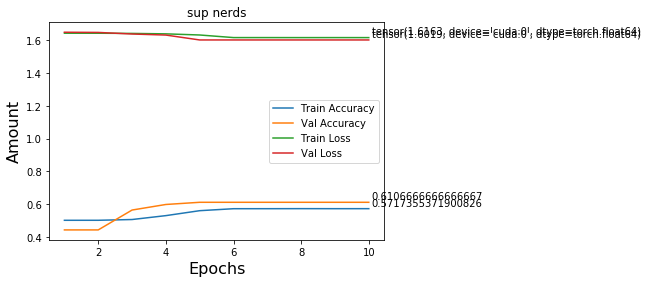

In [156]:
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" 

NUM_OF_AVGS = 5
avgs = []
"""
for i in range(NUM_OF_AVGS):
  
  
  
  avgs.append(results)

print(process_results(list_to_dict(avgs)))
"""
predicted_ys, text_model= run_model(models["my_model"], datasets["snopes"], Hyperparameters)
results = get_results("my_model", "snopes", predicted_ys.cpu(), datasets["snopes"].test_data)
print(results)
  #textual_entailment_model.to(device)
predicted_ys, text_model= run_model(models["my_model"], datasets["politifact"], Hyperparameters)
results = get_results("my_model", "politifact", predicted_ys.cpu(), datasets["politifact"].test_data)
print(results)

WOAH WERE DOIN SOME VALIDATION
PLEASE VALIDATE ME

In [38]:
evaluation_summary("textual entailment model", predicted_ys.cpu() ,datasets["politifact"].test_data)

Evaluation for: textual entailment model
Classifier 'textual entailment model' has Acc=0.631 P=0.614 R=0.636 F1=0.606 AUC=0.614
              precision    recall  f1-score   support

         0.0      0.417     0.648     0.507       836
         1.0      0.811     0.624     0.705      2019

    accuracy                          0.631      2855
   macro avg      0.614     0.636     0.606      2855
weighted avg      0.695     0.631     0.647      2855


Confusion matrix:
 [[ 542  759]
 [ 294 1260]]


(0.6137067120925691,
 0.6361983406442623,
 0.6311733800350263,
 0.6062714155888395)

JUST TESTIN HERE

In [39]:
test_results= batch_wise_evaluate(text_model, datasets["politifact"].test_loader, Hyperparameters)
evaluation_summary("textual entailment test model", test_results.cpu(), datasets["politifact"].test_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Evaluation for: textual entailment test model
Classifier 'textual entailment test model' has Acc=0.631 P=0.614 R=0.636 F1=0.606 AUC=0.614
              precision    recall  f1-score   support

         0.0      0.417     0.648     0.507       836
         1.0      0.811     0.624     0.705      2019

    accuracy                          0.631      2855
   macro avg      0.614     0.636     0.606      2855
weighted avg      0.695     0.631     0.647      2855


Confusion matrix:
 [[ 542  759]
 [ 294 1260]]


(0.6137067120925691,
 0.6361983406442623,
 0.6311733800350263,
 0.6062714155888395)

##running sheena's model

In [0]:
class SheenaParameters:
  lstm_hidden_size = 40
  dense_dimension = 20
  attention_hops = 10
  batch_size = BATCH_SIZE
  max_length = 150
  gravity = 70
  num_classes = 1
  avg=True
  epochs = 3
  inner_dropout=0.5
  outer_dropout=0.5
  C = 0.3
  is_debug = True
  grad_clip = True
  lr=0.0005
  decay = 0

Running EPOCH: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Train Epoch: 0 [0/23817 (0%)]	Loss: 1.632923, ISvAL: False
Train Epoch: 0 [1000/23817 (4%)]	Loss: 1.636421, ISvAL: False
Train Epoch: 0 [2000/23817 (8%)]	Loss: 1.635293, ISvAL: False
Train Epoch: 0 [3000/23817 (13%)]	Loss: 1.635388, ISvAL: False
Train Epoch: 0 [4000/23817 (17%)]	Loss: 1.635880, ISvAL: False
Train Epoch: 0 [5000/23817 (21%)]	Loss: 1.635460, ISvAL: False
Train Epoch: 0 [6000/23817 (25%)]	Loss: 1.633643, ISvAL: False
Train Epoch: 0 [7000/23817 (29%)]	Loss: 1.633273, ISvAL: False
Train Epoch: 0 [8000/23817 (34%)]	Loss: 1.633423, ISvAL: False
Train Epoch: 0 [9000/23817 (38%)]	Loss: 1.629028, ISvAL: False
Train Epoch: 0 [10000/23817 (42%)]	Loss: 1.622762, ISvAL: False
Train Epoch: 0 [11000/23817 (46%)]	Loss: 1.628427, ISvAL: False
Train Epoch: 0 [12000/23817 (50%)]	Loss: 1.607216, ISvAL: False
Train Epoch: 0 [13000/23817 (55%)]	Loss: 1.643706, ISvAL: False
Train Epoch: 0 [14000/23817 (59%)]	Loss: 1.598359, ISvAL: False
Train Epoch: 0 [15000/23817 (63%)]	Loss: 1.585997, ISvAL

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


{'model_name': 'sheena_model', 'dataset_name': 'politifact', 'precision': 0.644042252420423, 'recall': 0.6448108028546651, 'accuracy': 0.647985989492119, 'f1': 0.6443161427681551, 'auc': 0.644042252420423}
Running EPOCH: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Train Epoch: 0 [0/12119 (0%)]	Loss: 1.635951, ISvAL: False
Train Epoch: 0 [1000/12119 (8%)]	Loss: 1.640356, ISvAL: False
Train Epoch: 0 [2000/12119 (17%)]	Loss: 1.632332, ISvAL: False
Train Epoch: 0 [3000/12119 (25%)]	Loss: 1.633542, ISvAL: False
Train Epoch: 0 [4000/12119 (33%)]	Loss: 1.636716, ISvAL: False
Train Epoch: 0 [5000/12119 (41%)]	Loss: 1.634425, ISvAL: False
Train Epoch: 0 [6000/12119 (50%)]	Loss: 1.634336, ISvAL: False
Train Epoch: 0 [7000/12119 (58%)]	Loss: 1.634029, ISvAL: False
Train Epoch: 0 [8000/12119 (66%)]	Loss: 1.630527, ISvAL: False
Train Epoch: 0 [9000/12119 (74%)]	Loss: 1.628224, ISvAL: False
Train Epoch: 0 [10000/12119 (83%)]	Loss: 1.624626, ISvAL: False
Train Epoch: 0 [11000/12119 (91%)]	Loss: 1.614710, ISvAL: False
Train Epoch: 0 [12000/12119 (99%)]	Loss: 1.607607, ISvAL: False
Average loss is: tensor(1.6309, device='cuda:0', dtype=torch.float64) while validation_status: False
Accuracy of the model 0.512396694214876
Train Epoch: 0 [0/1507 (0%)]	Loss: 1.61768

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


{'model_name': 'sheena_model', 'dataset_name': 'snopes', 'precision': 0.6045969342424624, 'recall': 0.6153977601346022, 'accuracy': 0.6046966731898239, 'f1': 0.5951838540323087, 'auc': 0.6045969342424624}


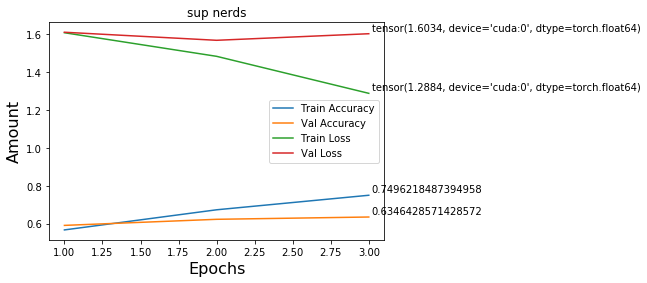

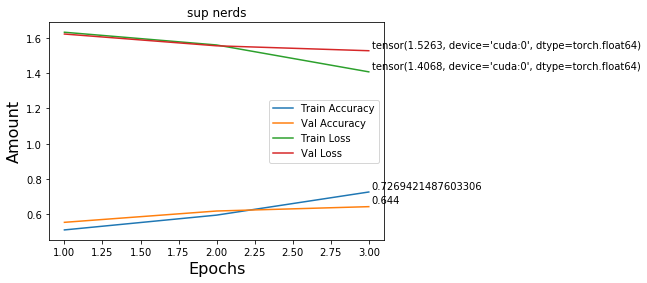

In [88]:
sheena_predicted_ys, model = run_model(models["sheena_model"], datasets["politifact"], SheenaParameters)
results = get_results("sheena_model", "politifact", sheena_predicted_ys.cpu(), datasets["politifact"].test_data)
print(results)
sheena_predicted_ys, model = run_model(models["sheena_model"], datasets["snopes"], SheenaParameters)
results = get_results("sheena_model", "snopes", sheena_predicted_ys.cpu(), datasets["snopes"].test_data)
print(results)

In [0]:
evaluation_summary("sheena model", sheena_predicted_ys.cpu(), datasets["politifact"].val_data)


##OK TESTING ON BROKE DECLARE

In [0]:
class DeclareParameters:
  lstm_hidden_size = 64
  attention_hops = 10
  batch_size = BATCH_SIZE
  max_length = 100
  num_classes = 1
  inner_dropout=0
  outer_dropout=0
  epochs = 30
  C = 0
  is_debug = True
  lr=0.0002
  decay = 0
  grad_clip = False

In [0]:
predicted_ys, text_model= run_model(models["real_declare"], datasets["snopes"], DeclareParameters)
results = get_results("real_declare", "snopes", predicted_ys.cpu(), datasets["snopes"].test_data)

TESTING ON REAL DECLARE

In [0]:
declare_real_results, declare_predicted_ys =  run_model(models["real_declare"], datasets["politifact"], Hyperparameters)

In [0]:
evaluation_summary("real declare model", declare_predicted_ys.cpu(), declare_real_results.cpu(), datasets["politifact"].test_data)


                  "model_name":model_name,
                  "dataset_name": dataset_name,
                  "precision":precision,
                  "recall": recall,
                  "accuracy": accuracy,
                  "f1": f1,
                  "auc": auc

In [0]:
all_params = {
    "my_model": Hyperparameters,
    "sheena_model": SheenaParameters,
    "broke_declare": DeclareParameters,
    "real_declare": DeclareParameters
}

##VALIDATION LAND

In [0]:
avg_amount = 5
per_avg_amount = 10
import csv

full_results = []
avg_results = []
processed_results = []



for data_name in datasets:
  for model_name in models:
    some_results = []
  
    for per_avg_i in range(per_avg_amount):
      predicted_ys, model = run_model(models[model_name], datasets[data_name], all_params[model_name])
      full_results.append(get_results(model_name, data_name, predicted_ys.cpu(), datasets[data_name].test_data))
      some_results.append(get_results(model_name, data_name, predicted_ys.cpu(), datasets[data_name].test_data))
      
    processed_results.append(process_results(list_to_dict(some_results)))
    print(processed_results)
      #avg_results.append(get_avgs(some_results))

In [0]:
for result in full_results:
  print(result)